# Split operations

First, include some libraries

In [1]:
# Run boilerplate code to set up environment

#%run prelude.py
%run prelude.py --no-show-animations

Prelude loaded OK
(Animation display disabled)


## Split a tensor 

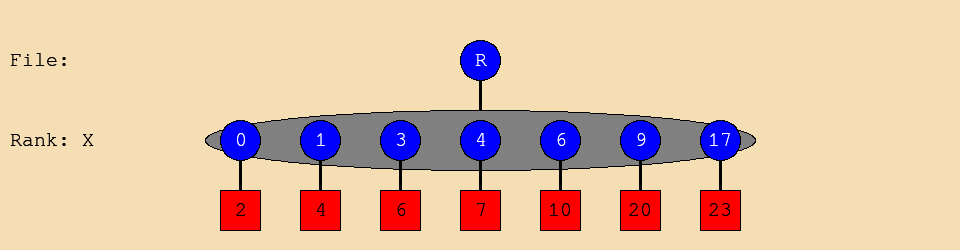

In [2]:
# 1D 

t_u = [ 2, 4, 0, 6, 7, 0, 10, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 23]
t = Tensor.fromUncompressed(["X"], t_u)
displayTensor(t)

### Split into equal parts (in coordinate space)

Before


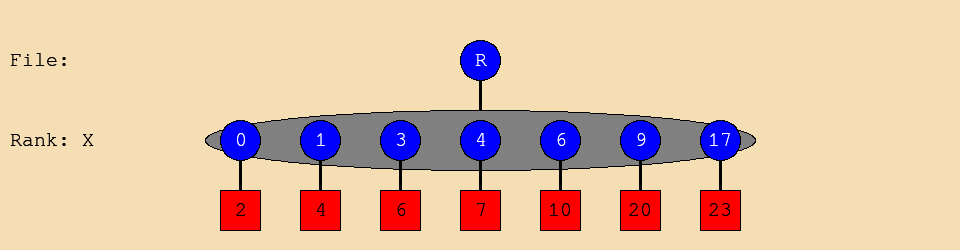

After - rank added at top with lower bound coordinates of each group


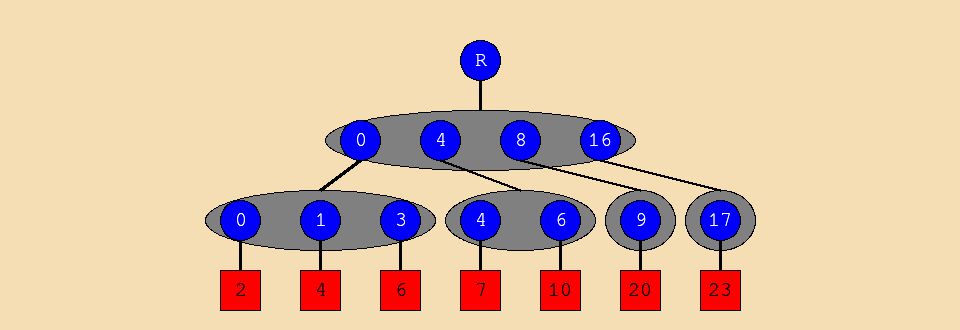

In [3]:
t_x = t.getRoot()
t_x_split_uniform = t_x.splitUniform(4)

print("Before")
displayTensor(t)
print("After - rank added at top with lower bound coordinates of each group")
displayTensor(t_x_split_uniform)

### Element-wise multiplication of split vectors (coordinate space)

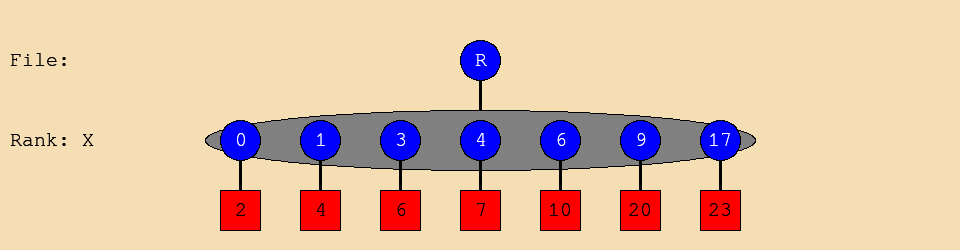

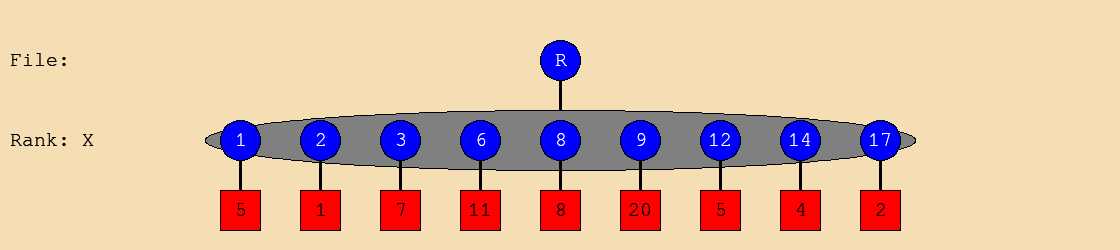

In [4]:
a_u = [ 2, 4, 0, 6, 7, 0, 10, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 23]
a = Tensor.fromUncompressed(["X"], a_u)
displayTensor(a)

b_u = [ 0, 5, 1, 7, 0, 0, 11, 0, 8, 20, 0, 0, 5, 0, 4, 0, 0, 2]
b = Tensor.fromUncompressed(["X"], b_u)
displayTensor(b)

z = Tensor(rank_ids=["X1", "X0"])

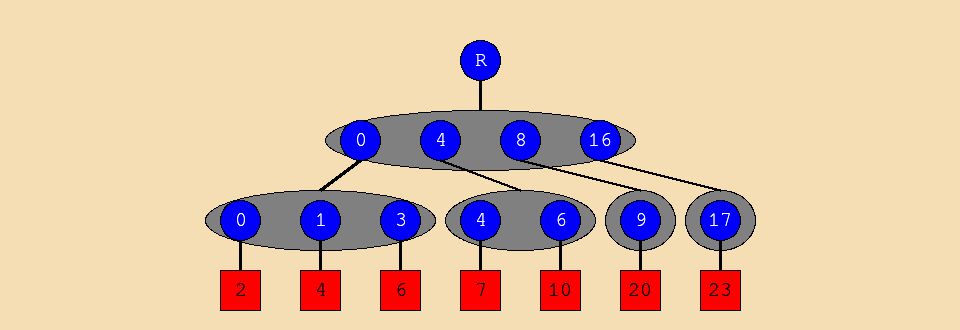

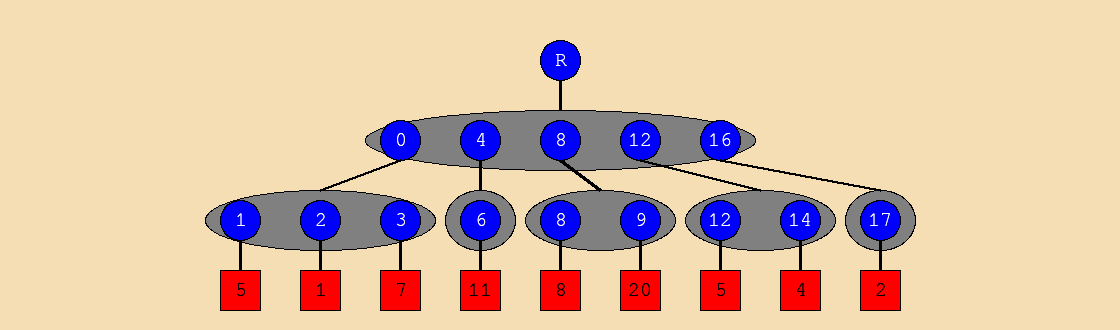

In [5]:
a_x = a.getRoot()
b_x = b.getRoot()
z_x = z.getRoot()

a_x_split = a_x.splitUniform(4)
b_x_split = b_x.splitUniform(4)

displayTensor(a_x_split)
displayTensor(b_x_split)

Processing X1=0
    Processing: X0=1
    Processing: X0=3
Processing X1=4
    Processing: X0=6
Processing X1=8
    Processing: X0=9
Processing X1=16
    Processing: X0=17


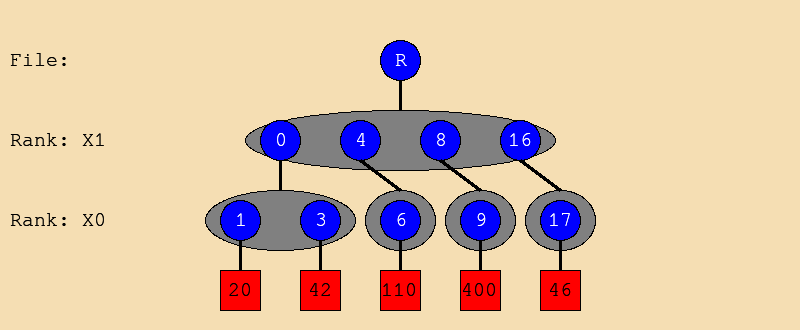

In [6]:
for x1, (z_x1_ref, (a_x0, b_x0)) in z_x << (a_x_split & b_x_split):
    print(f"Processing X1={x1}")
    for x0, (z_x1_ref, (a_val, b_val)) in z_x1_ref << (a_x0 & b_x0):
        print(f"    Processing: X0={x0}")
        z_x1_ref += a_val * b_val

displayTensor(z)

### Split into equal parts (in coordinate space, relative coordinates)

Before


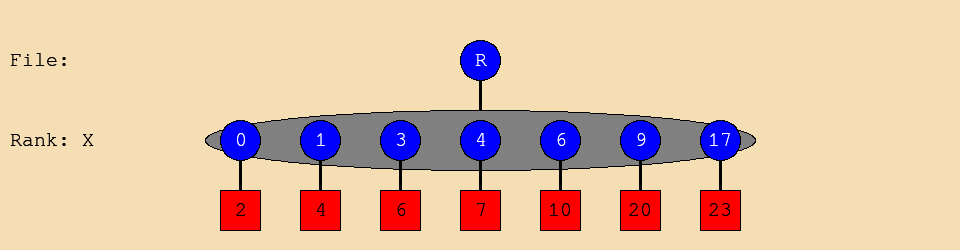

After - lower rank coordinates are relative to parent's coordinate


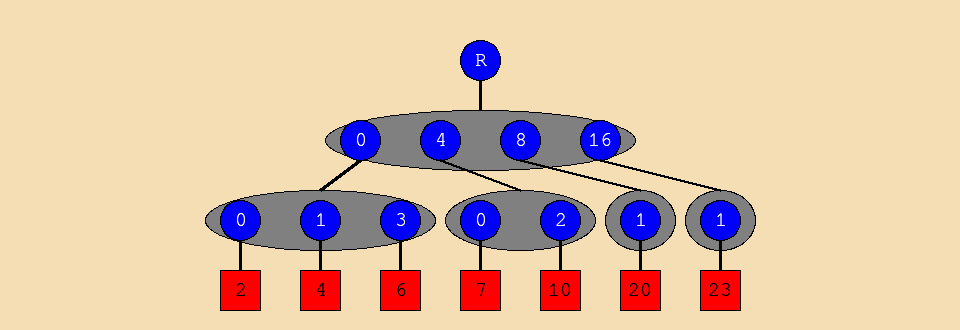

In [7]:
t_x_split_uniform = t_x.splitUniform(4, relativeCoords=True)

print("Before")
displayTensor(t)
print("After - lower rank coordinates are relative to parent's coordinate")
displayTensor(t_x_split_uniform)

### Split into equal parts (in position space)

Before


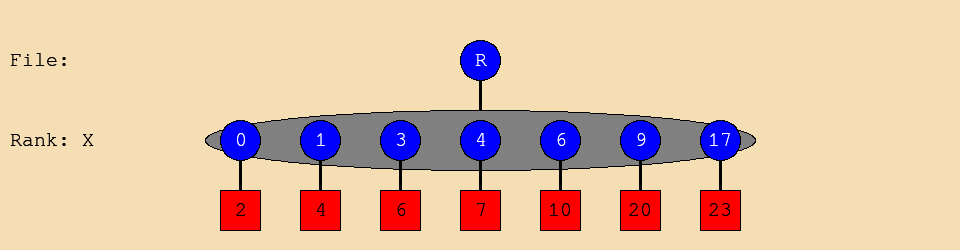

After - new dense rank added at top


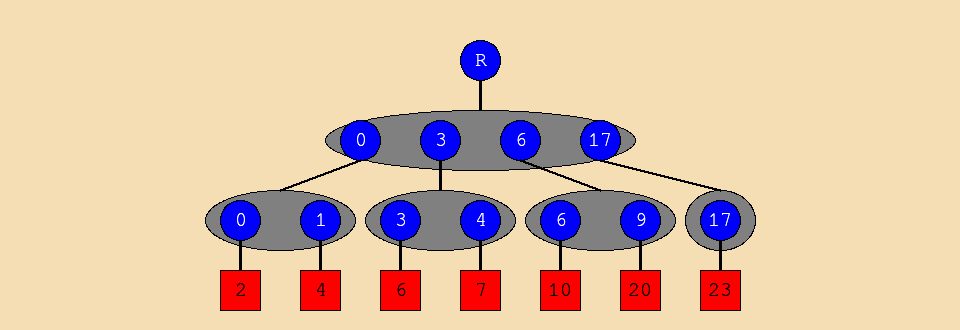

In [8]:
t_x_split_equal = t_x.splitEqual(2)

print("Before")
displayTensor(t)
print("After - new dense rank added at top")
displayTensor(t_x_split_equal)

### Element-wise multiplication of split vectors (position space)

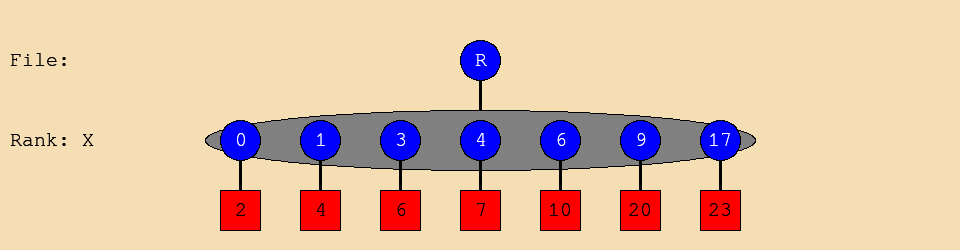

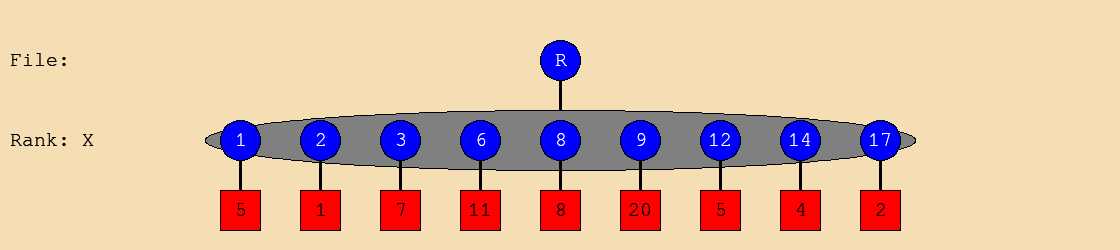

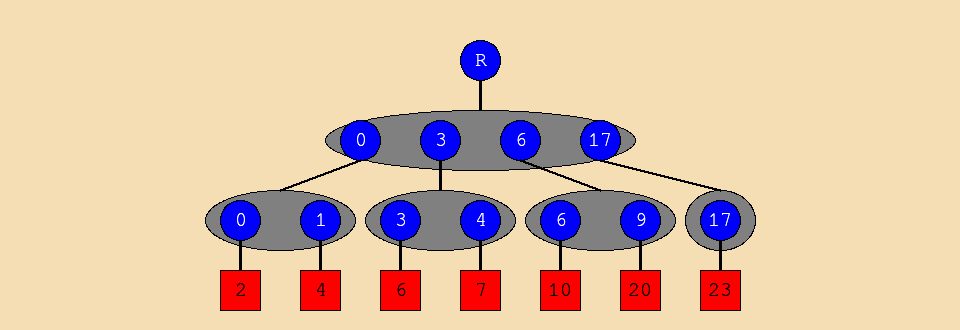

a_x was split on the following coordinates: [0, 3, 6, 17]


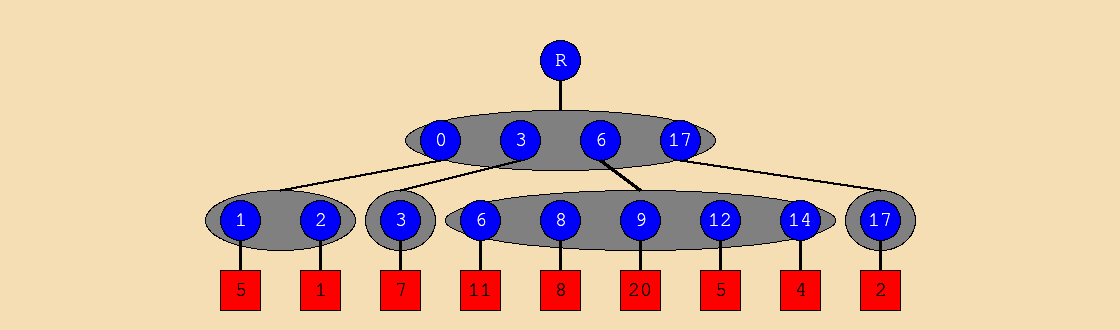

In [9]:
a_u = [ 2, 4, 0, 6, 7, 0, 10, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 23]
a = Tensor.fromUncompressed(["X"], a_u)
displayTensor(a)

b_u = [ 0, 5, 1, 7, 0, 0, 11, 0, 8, 20, 0, 0, 5, 0, 4, 0, 0, 2]
b = Tensor.fromUncompressed(["X"], b_u)
displayTensor(b)

z = Tensor(rank_ids=["X1", "X0"])

a_x = a.getRoot()
b_x = b.getRoot()
z_x = z.getRoot()


a_x_split = a_x.splitEqual(2)

displayTensor(a_x_split)

print(f"a_x was split on the following coordinates: {a_x_split.coords}")

# Split on the coordinates of each split in "a"
b_x_split = b_x.splitNonUniform(a_x_split)

displayTensor(b_x_split)

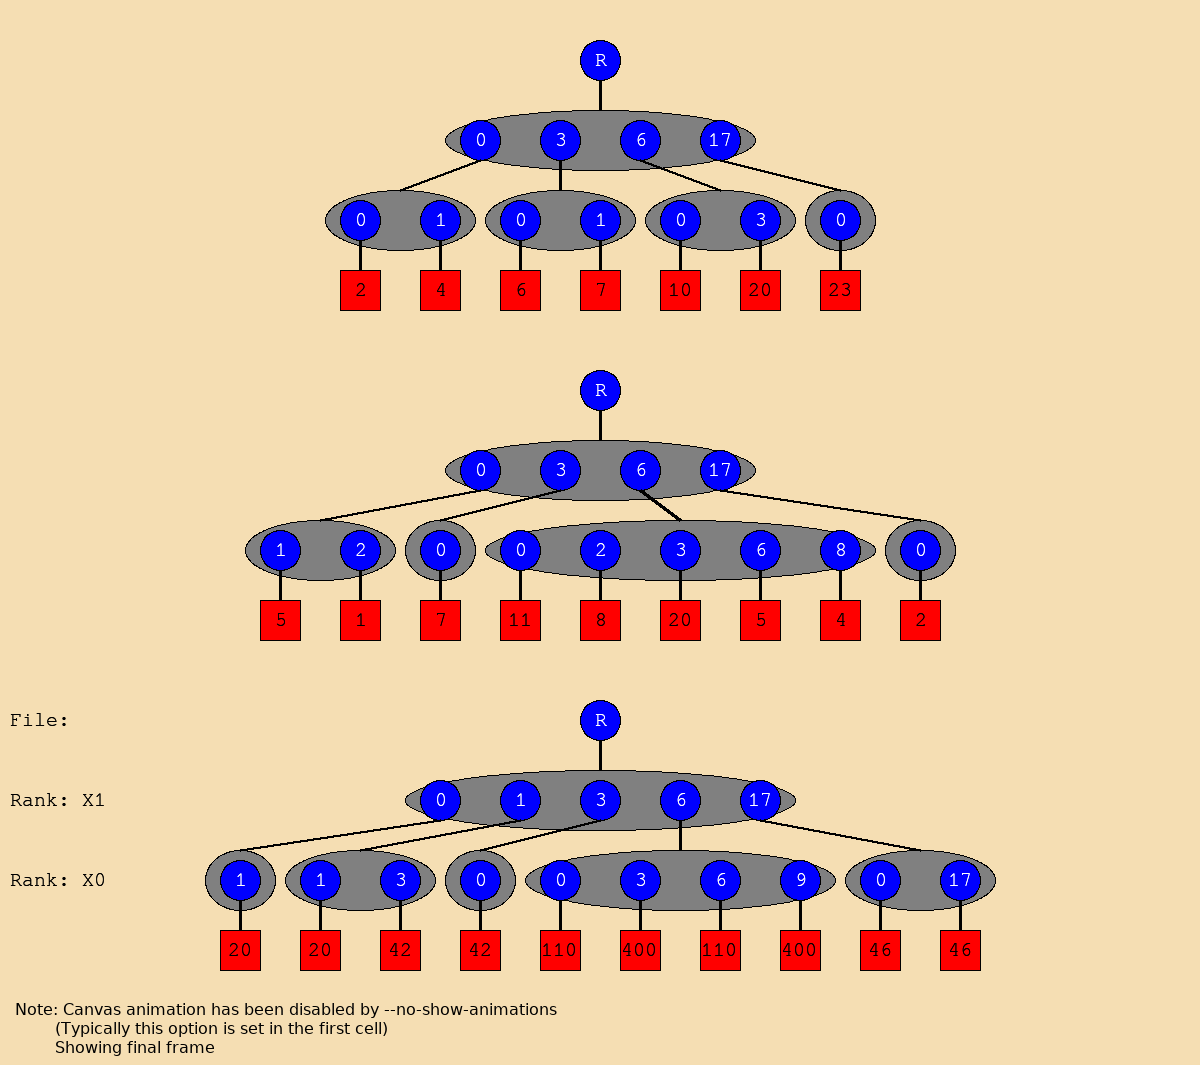

In [17]:
canvas = TensorCanvas(a_x_split, b_x_split, z)

for x1, (z_x1_ref, (a_x0, b_x0)) in z_x << (a_x_split & b_x_split):
    for x0, (z_x1_ref, (a_val, b_val)) in z_x1_ref << (a_x0 & b_x0):
        z_x1_ref += a_val * b_val
        canvas.addFrame((x1,x0), (x1,x0), (x1,x0))

displayCanvas(canvas)


### Element-wise multiplication of split vectors (position space, relative coordinates)

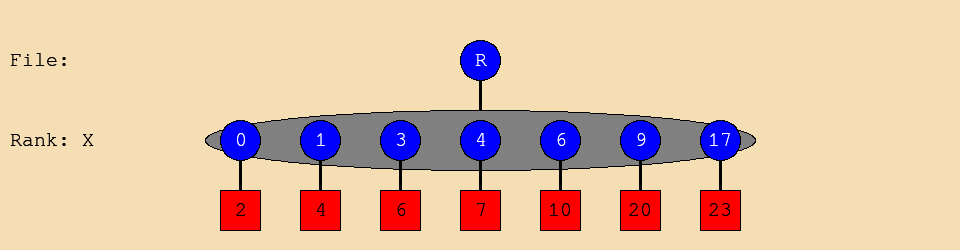

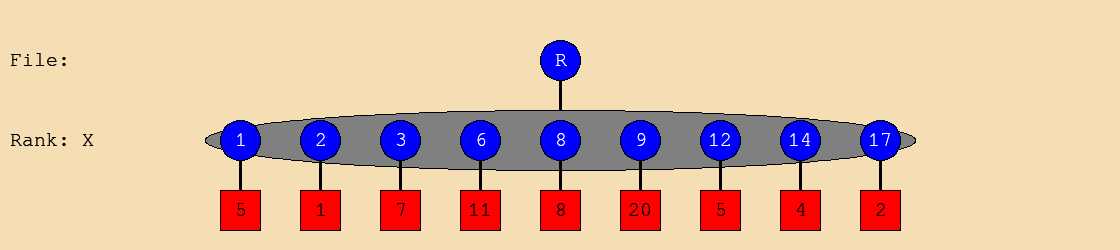

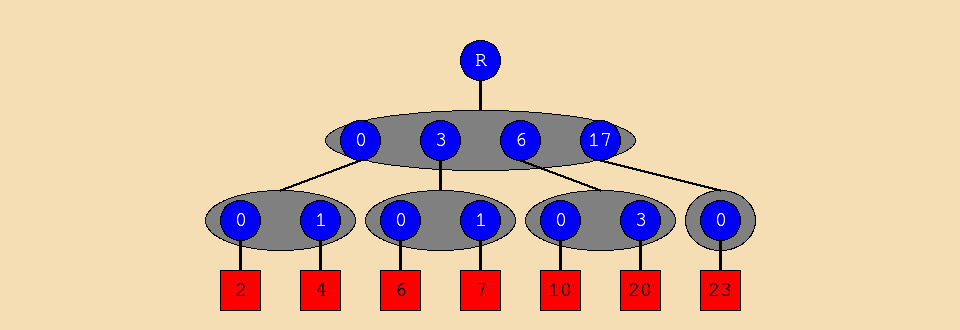

a_x was split on the following coordinates: [0, 3, 6, 17]


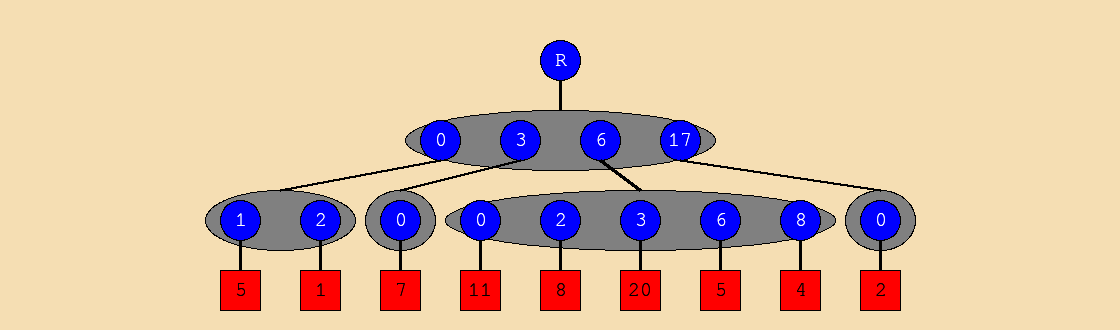

In [18]:
a_u = [ 2, 4, 0, 6, 7, 0, 10, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 23]
a = Tensor.fromUncompressed(["X"], a_u)
displayTensor(a)

b_u = [ 0, 5, 1, 7, 0, 0, 11, 0, 8, 20, 0, 0, 5, 0, 4, 0, 0, 2]
b = Tensor.fromUncompressed(["X"], b_u)
displayTensor(b)

z = Tensor(rank_ids=["X1", "X0"])

a_x = a.getRoot()
b_x = b.getRoot()
z_x = z.getRoot()


a_x_split = a_x.splitEqual(2, relativeCoords=True)

displayTensor(a_x_split)

print(f"a_x was split on the following coordinates: {a_x_split.coords}")

# Split on the coordinates of each split in "a"
b_x_split = b_x.splitNonUniform(a_x_split, relativeCoords=True)

displayTensor(b_x_split)

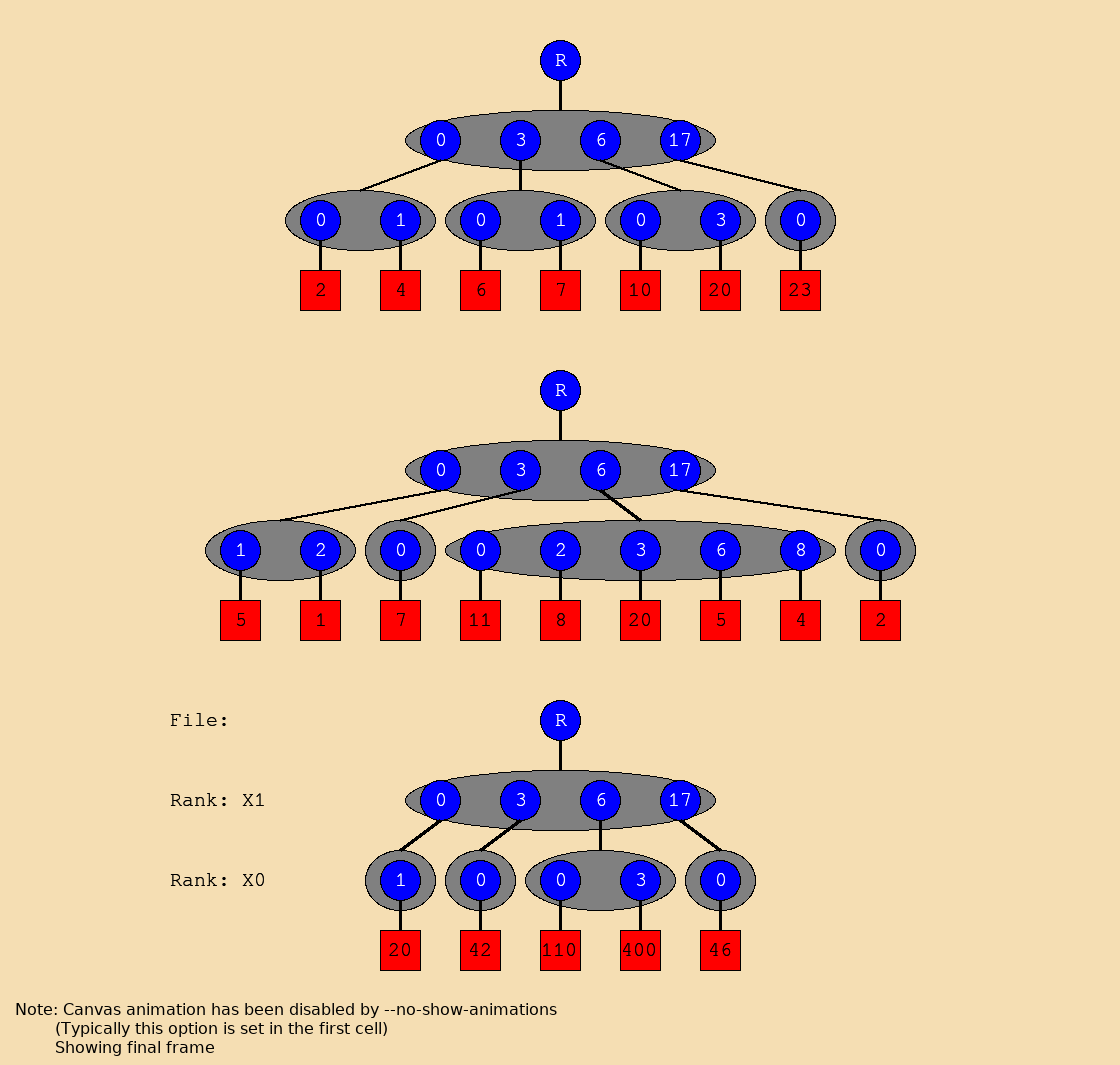

In [19]:
canvas = TensorCanvas(a_x_split, b_x_split, z)

for x1, (z_x1_ref, (a_x0, b_x0)) in z_x << (a_x_split & b_x_split):
    for x0, (z_x1_ref, (a_val, b_val)) in z_x1_ref << (a_x0 & b_x0):
        z_x1_ref += a_val * b_val
        canvas.addFrame((x1,x0), (x1,x0), (x1,x0))

displayCanvas(canvas)


### Element-wise multiplication of split vectors after intersection (position space)

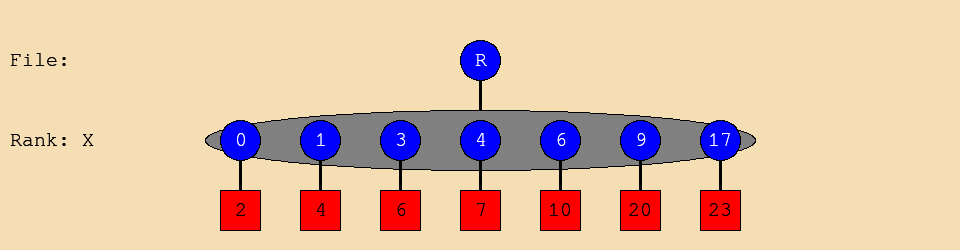

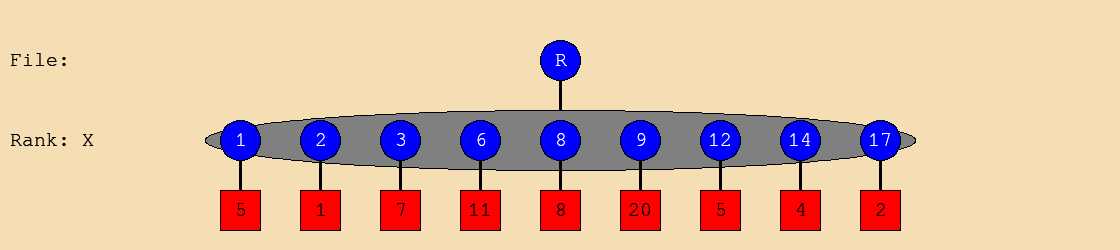

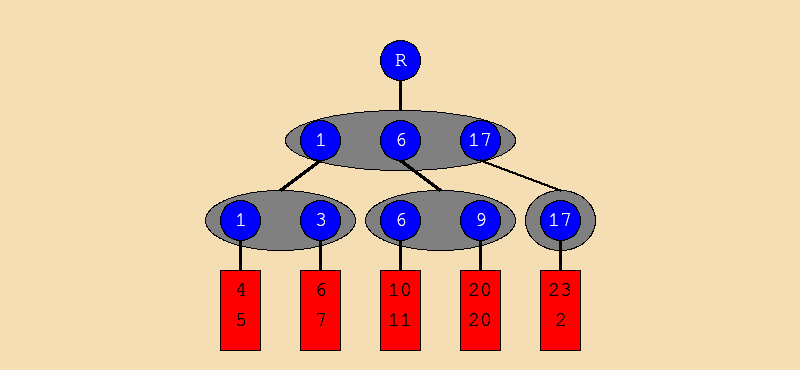

ab_x was split on the following coordinates: [1, 6, 17]


In [20]:
a_u = [ 2, 4, 0, 6, 7, 0, 10, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 23]
a = Tensor.fromUncompressed(["X"], a_u)
displayTensor(a)

b_u = [ 0, 5, 1, 7, 0, 0, 11, 0, 8, 20, 0, 0, 5, 0, 4, 0, 0, 2]
b = Tensor.fromUncompressed(["X"], b_u)
displayTensor(b)

z = Tensor(rank_ids=["X1", "X0"])

a_x = a.getRoot()
b_x = b.getRoot()
z_x = z.getRoot()


ab_x = a_x & b_x
ab_x_split = ab_x.splitEqual(2)

displayTensor(ab_x_split)

print(f"ab_x was split on the following coordinates: {ab_x_split.coords}")



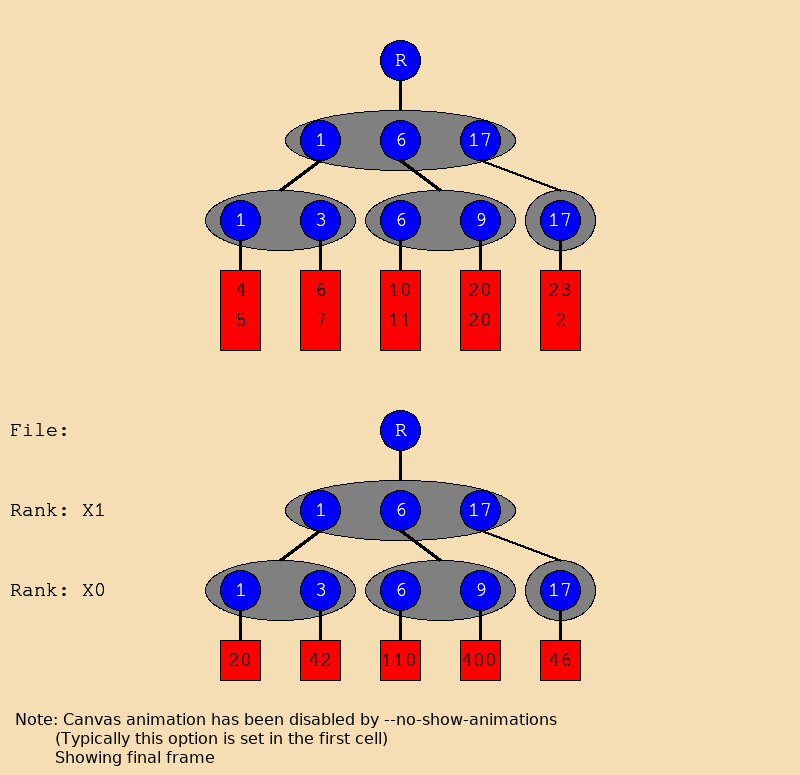

In [21]:
# Combine tuples in bottom rank of ab_x_split

canvas = TensorCanvas(ab_x_split, z)

for x1, (z_x1_ref, ab_x0) in z_x << ab_x_split:
    for x0, (z_x1_ref, (a_val, b_val)) in z_x1_ref << ab_x0:
        z_x1_ref += a_val * b_val
        canvas.addFrame((x1,x0), (x1,x0))

displayCanvas(canvas)

## Split after flattening

### Generate matrices

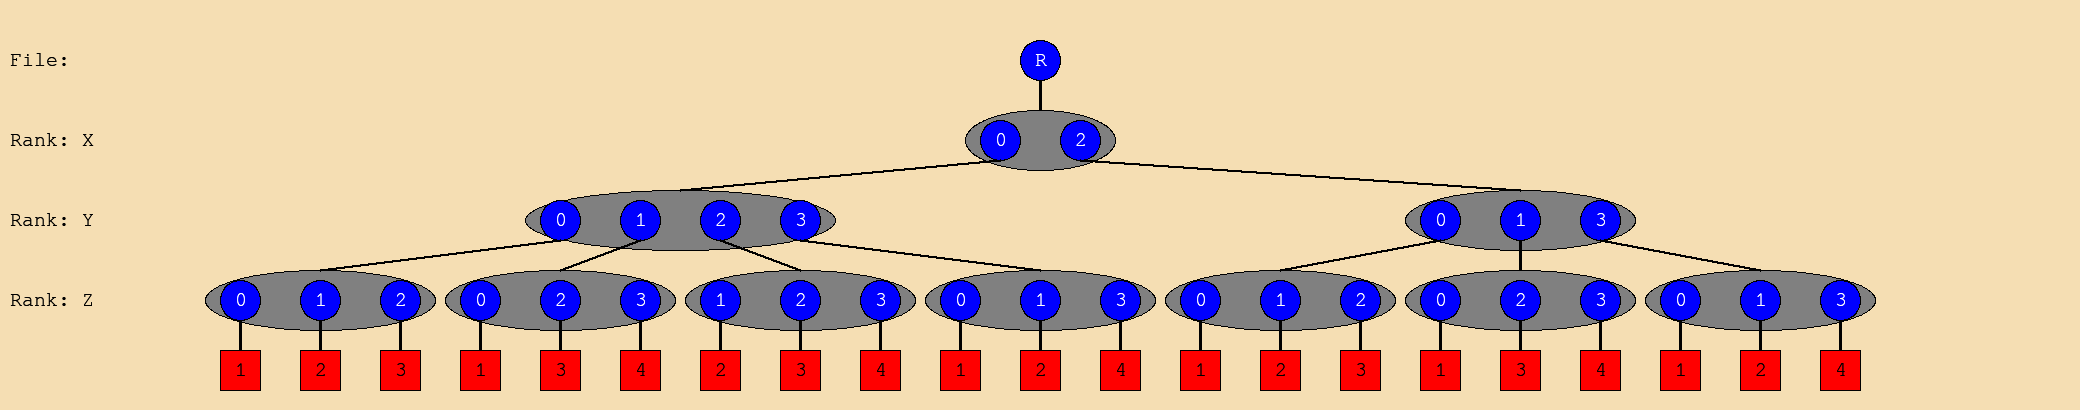

In [22]:
u_t = [ [ [ 1, 2, 3, 0],
          [ 1, 0, 3, 4],
          [ 0, 2, 3, 4],
          [ 1, 2, 0, 4] ],
        [ [ 0, 0, 0, 0],
          [ 0, 0, 0, 0],
          [ 0, 0, 0, 0],
          [ 0, 0, 0, 0] ],
        [ [ 1, 2, 3, 0],
          [ 1, 0, 3, 4],
          [ 0, 0, 0, 0],
          [ 1, 2, 0, 4] ] ]

t = Tensor.fromUncompressed(["X", "Y", "Z"], u_t)

displayTensor(t)

### Illustrate flattening and unflattening

Original


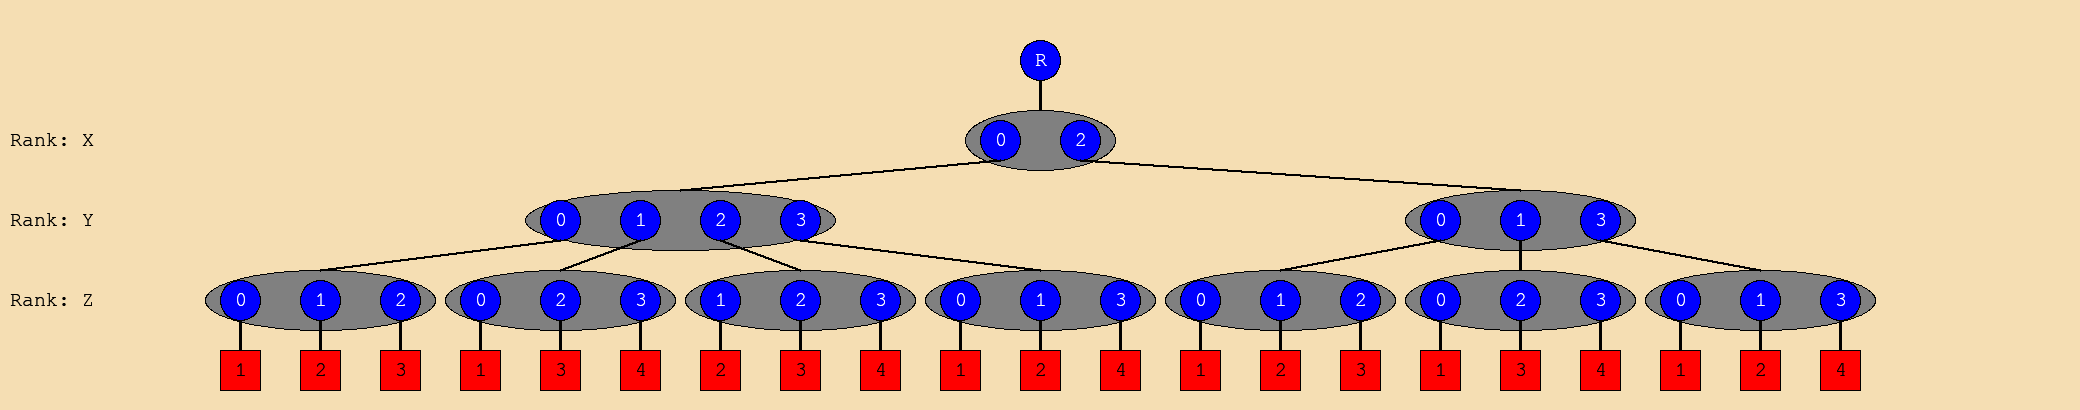

Flattened


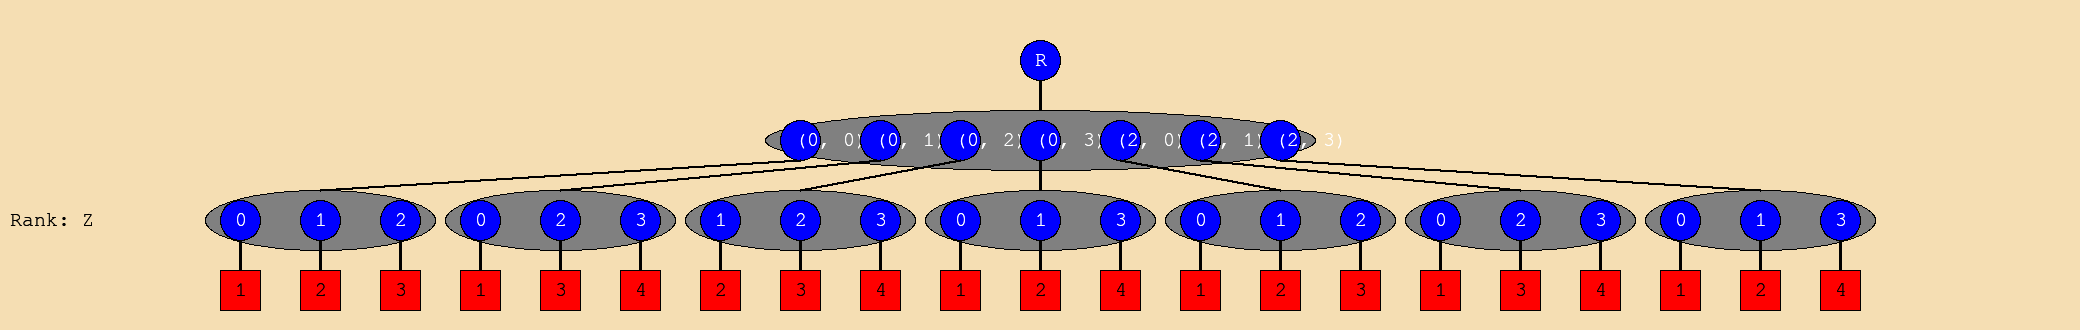

Unflattend


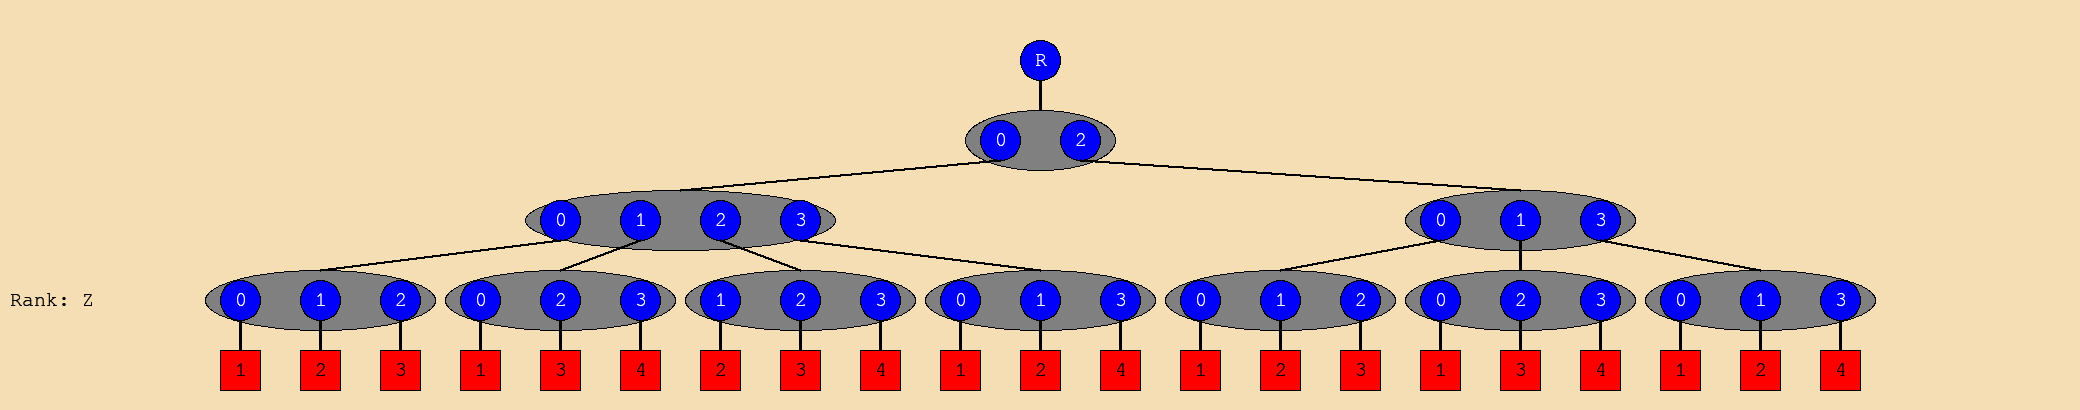

Transform from flattened back to unflattned worked: True


In [24]:
a = t.getRoot()

print("Original")
displayTensor(a)

a_flattened = a.flattenRanks()

print("Flattened")
displayTensor(a_flattened)

a_unflattened = a_flattened.unflattenRanks()

print("Unflattend")
displayTensor(a_unflattened)

print("Transform from flattened back to unflattned worked: %s" % (a == a_unflattened))

### Split the flattened tensor into equal parts

Before


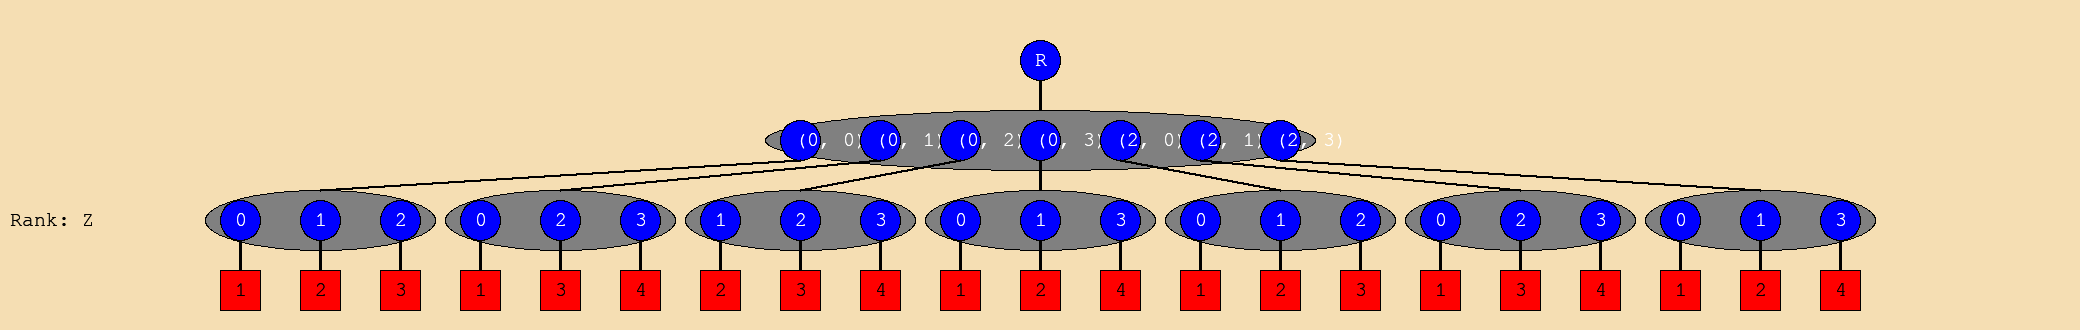

After - new dense rank added at top


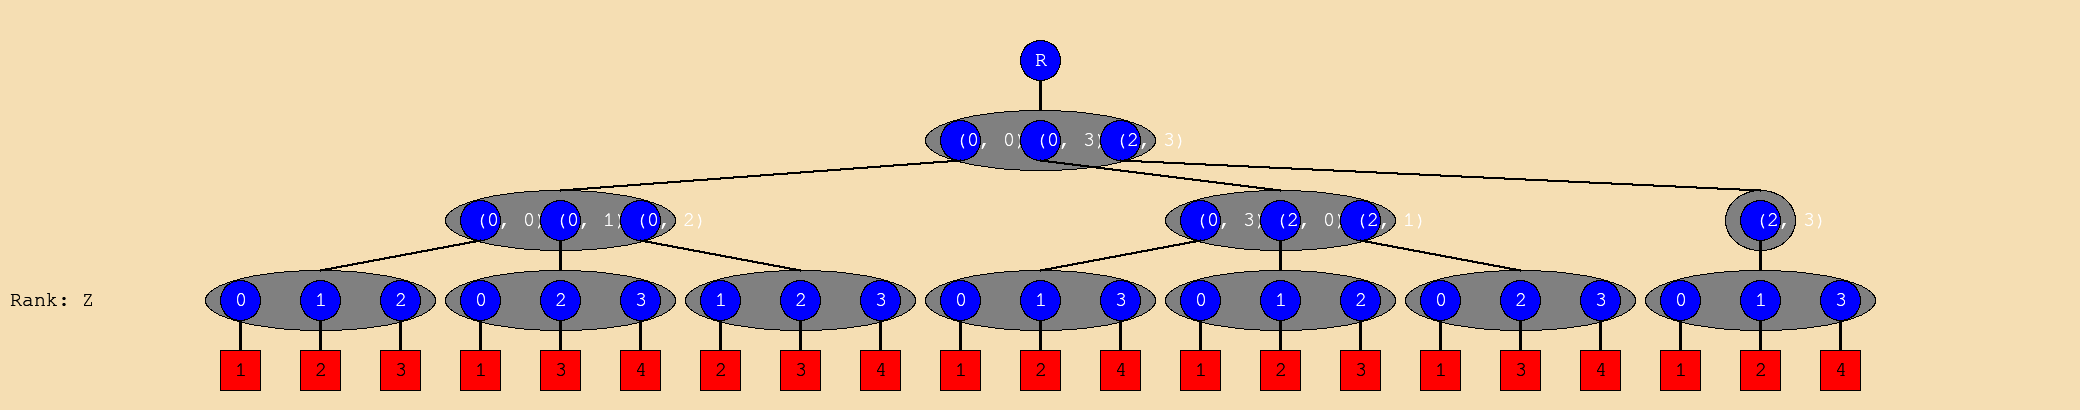

In [25]:
# Using a_flattened created in cell above..

a_flattened_split = a_flattened.splitEqual(3)

print("Before")
displayTensor(a_flattened)
print("After - new dense rank added at top")
displayTensor(a_flattened_split)

### Unflatten the split tensor

Original


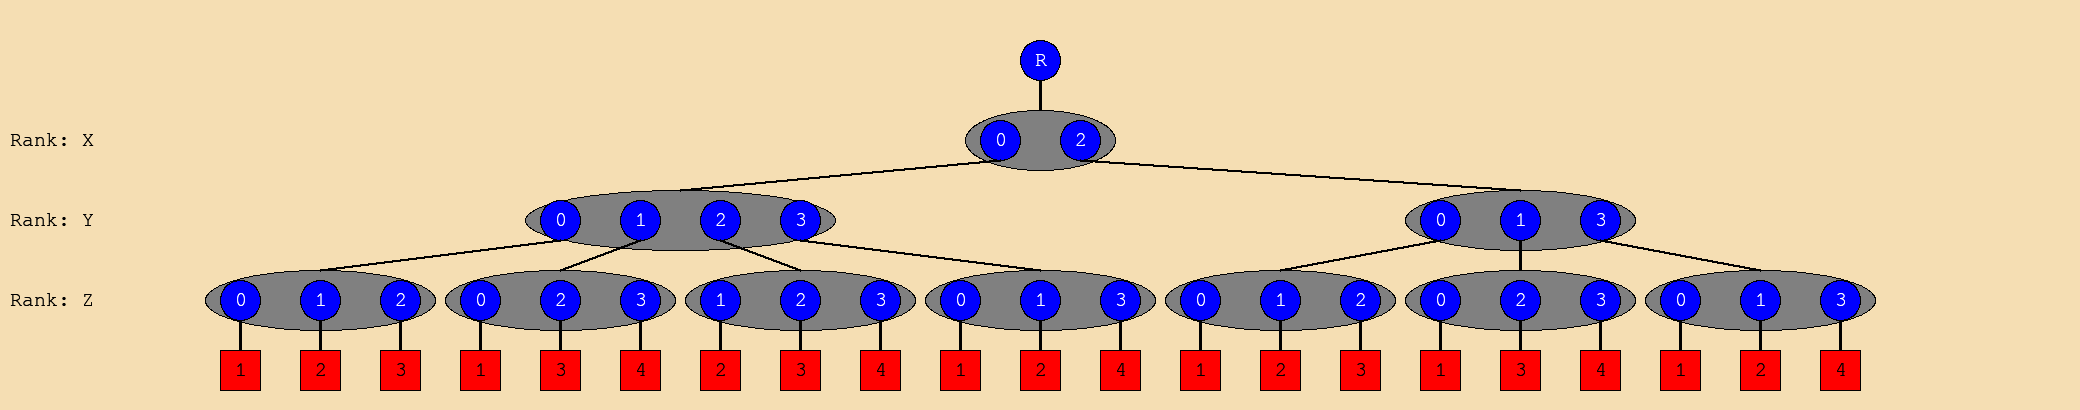

Flattened split


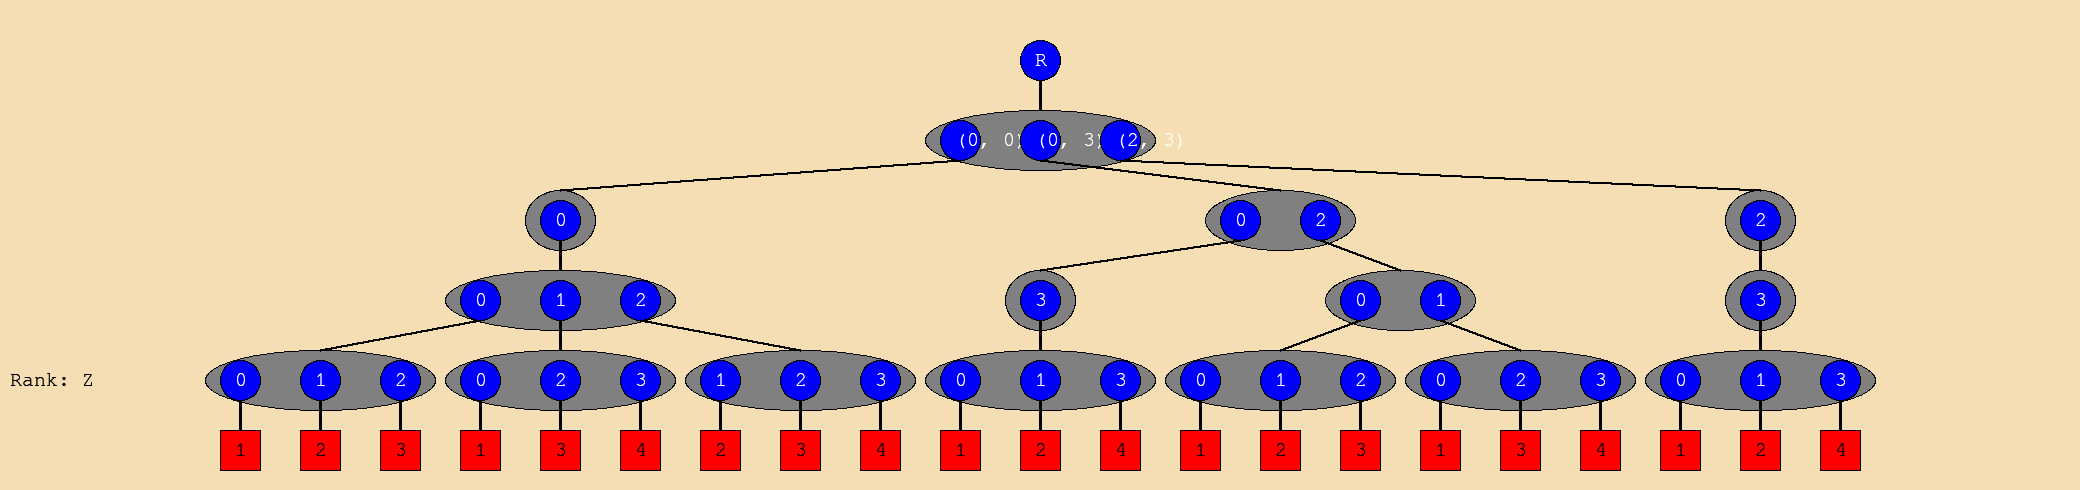

AssertionError: 

In [27]:
# Uses a_flattened_split created in cell above

print("Original")
displayTensor(a)
print("Flattened split")
displayTensor(a_flattened_split)

# Note: a_flattened_split is about to be be modified
a_flattened_split.updatePayloads(Fiber.unflattenRanks)

print("Final - note repeated coordinates in 2nd rank from top")
displayTensor(a_flattened_split)

### Create (rank labeled) tensor from split fiber

Note that the X rank has been split but now coordinates in X0 are repeated

In [ ]:
t_final = Tensor.fromFiber(["X1", "X0", "Y", "Z"], a_flattened_split)

displayTensor(t_final)

## Testing area

For running alternative algorithms

In [ ]:
a_u = [ 2, 4, 0, 6, 7, 0, 10, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 23]
a = Tensor.fromUncompressed(["X"], a_u)
displayTensor(a)


a_x = a.getRoot()

a_x_split = a_x.splitEqual(2)
displayTensor(a_x_split)

a_x_t = a_x_split.swapRanks()
displayTensor(a_x_t)
